In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib widget

import importlib
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import ExperimentClass
import tools


In [13]:
importlib.reload(ExperimentClass)
importlib.reload(tools)
#manip = ExperimentClass.Experiment("20230710_vitesse_photochimique", "JTS", local = "IBPC")
#manip = ExperimentClass.Experiment("20230712_ek", "JTS", local = "IBPC")
manip = ExperimentClass.Experiment("20230721_vitesse_photochimique", "JTS", local = "IBPC")

In [14]:
#records = tools.create_record_list("6-26")
#PWM_rel = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.08, 0.1, 0.12, 0.14, 0.16, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.08, 0.04]

records = tools.create_record_list("16-21")
PWM_rel = [0.01, 0.04, 0.1, 0.25, 0.5, 0.8]




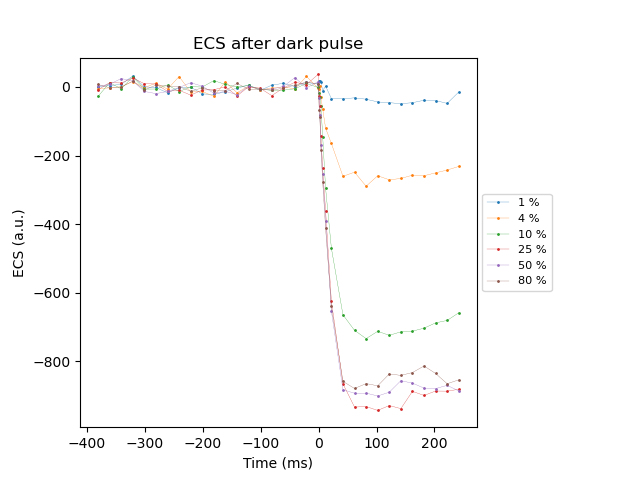

In [15]:
fig, ax = plt.subplots()
for i, k in enumerate(PWM_rel):
    ax.plot(manip.clean_times[i+3], manip.clean_data[i+3], 'o-', label = f"{100*k:n} %", markersize = 1, linewidth = 0.2)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = 8.1)
ax.set_xlabel("Time (ms)")
ax.set_ylabel("ECS (a.u.)")
ax.set_title("ECS after dark pulse")
#ax.set_xlim(-25, 70)
plt.show()

# $E_{k}$ determination using PWM

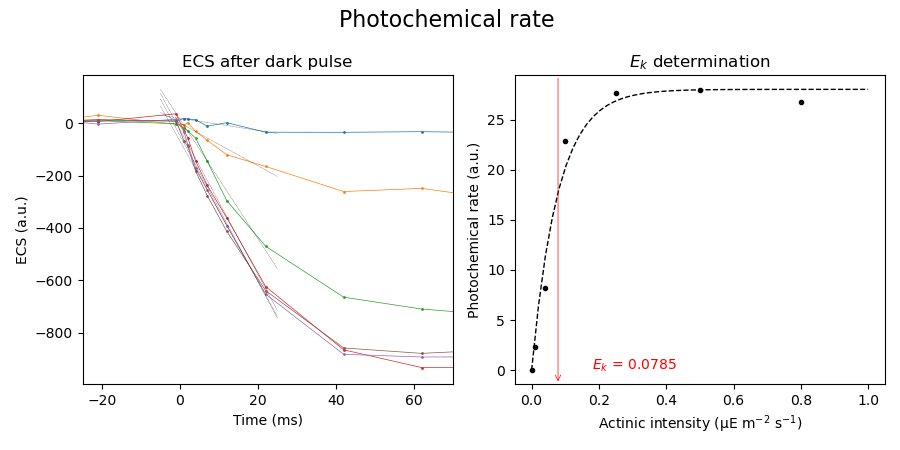

In [16]:
import math_functions as mf
importlib.reload(mf)
importlib.reload(tools)

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (9,4.5))
figure_name = "Photochemical rate "
fig.suptitle(figure_name, fontsize = 16)

Intensity = 1326 * np.asarray(PWM_rel) + 11.9
Intensity_rel = PWM_rel.copy()

start = -5
stop = 25
num = 50
index_stop_fit = 26

xfit = []
yfit = []
param = []
vitesse = []


xdata = manip.clean_times[4][21:index_stop_fit]


for i, k in enumerate(PWM_rel):
    ax1.plot(manip.clean_times[i+3], manip.clean_data[i+3], 'o-', label = f"I = {100*k:n} %", markersize = 1, linewidth = 0.5)
    ydata = manip.clean_data[i+3][21:index_stop_fit]
    popt, x, y =  tools.lin_fit(xdata, ydata, start, stop, num)
    xfit.append(x)
    yfit.append(y)
    param.append(popt)
    ax1.plot(xfit[i],yfit[i], '--', color ='k', linewidth = 0.2)
    vitesse.append(-param[i][0])
    
ax1.set_xlabel("Time (ms)")
ax1.set_ylabel("ECS (a.u.)")
ax1.set_title("ECS after dark pulse")
ax1.set_xlim(-25, 70)
    
#Intensity.insert(0,0)
Intensity_rel = np.insert(Intensity_rel, 0, 0)
Intensity = np.insert(Intensity, 0, 0)
vitesse.insert(0,0)



Ek_fit = "exp" # "lin", "exp"
if Ek_fit == "exp":   
    popt, xfit, yfit = tools.Ek_fit(Intensity_rel, vitesse, 0, 1, 50, p0 = [1.75, 0.2])
    ax2.plot(Intensity_rel, vitesse,'o', color ='k', markersize = 3)
    ax2.plot(xfit, yfit, '--', color ='k', linewidth = 1)
    Ek = popt[1]
    ax2.annotate("", xy=(Ek, ax2.get_ylim()[0]), xytext=(Ek, ax2.get_ylim()[1]), arrowprops=dict(arrowstyle="->", color="red", linewidth = 0.5))
    ax2.text(Ek + 0.1, 0.075, f"$E_k$ = {Ek:.4f}", fontsize = 10, color = "red")
    
if Ek_fit == "exp_µE":   
    popt, xfit, yfit = tools.Ek_fit(Intensity, vitesse, 0, 1200, 50, p0 = [200, 1.75])
    ax2.plot(Intensity, vitesse,'o', color ='k', markersize = 3)
    ax2.plot(xfit, yfit, '--', color ='k', linewidth = 1)
    Ek = popt[1]
    ax2.annotate("", xy=(Ek, ax2.get_ylim()[0]), xytext=(Ek, ax2.get_ylim()[1]), arrowprops=dict(arrowstyle="->", color="red", linewidth = 0.5))
    ax2.text(Ek + 10, 0.05, f"$E_k$ = {Ek:.0f}", fontsize = 10, color = "red")

if Ek_fit == "lin":
    ax2.plot(Intensity, vitesse,'o', color ='k', markersize = 3)
    popt1, x1fit, y1fit = tools.lin_fit(Intensity[0:8], vitesse[0:8], 0, 200,30)
    popt2, x2fit, y2fit = tools.lin_fit(Intensity[8:10], vitesse[8:10], 0, 400,30)
    ax2.plot(x1fit, y1fit, '--', color ='k', linewidth = 1)
    ax2.plot(x2fit, y2fit, '--', color ='k', linewidth = 1)
    Ek = (popt2[1] - popt1[1])/(popt1[0] - popt2[0])
    ax2.annotate("", xy=(Ek, 0), xytext=(Ek, 200), arrowprops=dict(arrowstyle="->", color="red", linewidth = 0.5))
    ax2.text(Ek + 0.1, 30, f"$E_k$ = {Ek:.0f}" + " µE$m^{-2} s^{-1}$", fontsize = 10, color = "red")
    
    
   


ax2.set_title("$E_{k}$ determination")
ax2.set_xlabel("Actinic intensity (µE m$^{-2}$ s$^{-1}$)")
#ax2.set_ylabel("Photochemical rate \n ($charge$ $separation$ $photosystem^{-1}$ $s^{-1}$)")
ax2.set_ylabel("Photochemical rate (a.u.)")
# ax2.set_xlim([0,0.13])
# ax2.set_ylim([0,100])

fig.tight_layout()

plt.show()

fig_folder = manip.path + "/Figures"
if not os.path.isdir(fig_folder):
    os.mkdir(fig_folder)

fig.savefig(fig_folder + "/" + figure_name + Ek_fit + ".png")

NameError: name 'x1fit' is not defined

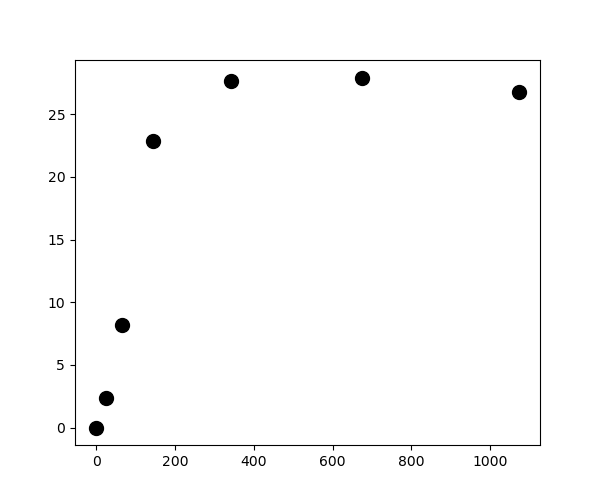

In [17]:
line = 2.5
marker = 10
labelsize = 18
legendfontsize = 14

fig, ax = plt.subplots(figsize=(6,5), facecolor='none')
fig_title = "Ek"


ax.plot(Intensity, vitesse, "o", markersize=marker, color = "black")
ax.plot(x1fit, y1fit, '--', color ='k',linewidth=line)
ax.set_xlabel("Actinic intensity (µEm$^{-2}$s$^{-1}$)", fontsize = labelsize)
ax.set_ylabel("Photochemical rate \n (elec. $photosystem^{-1}s^{-1}$)", fontsize = labelsize)
ax.set_ylim(-10, 140)
ax.set_xlim(-10, 100)

ax = plt.gca()
ax.tick_params(axis='both', which='both', width=2)

for label in ax.xaxis.get_ticklabels():
    label.set_fontsize(labelsize)
    
for label in ax.yaxis.get_ticklabels():
    label.set_fontsize(labelsize)

for spine in ax.spines.values():
    spine.set_linewidth(1.5)

fig.tight_layout()
fig.patch.set_alpha(0)
ax.patch.set_alpha(0)

fig.savefig(fig_folder + "ekposter.png", dpi=300)